In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Today we will use the TensorFlow framework to implement this task.
#If you feel it's too outdated, you can replace it with the PyTorch framework to achieve the same task.


# Data Pre-processing

In [18]:
!pip install ace_tools

In [21]:
from IPython.display import display
# Read the data
df = pd.read_csv('./breast-cancer.txt')
display(df)

# Drop the ID column
df.drop(['id'], axis=1, inplace=True)

# Replace the missing values and non-numeric values.
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.dropna(inplace=True)

# Create features and labels arrays
X = df.drop(['class'], axis=1).values
y = (df['class'] == 4).astype(int).values  # Using 4 as malignant

# Scale the features array using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#test_size=0.2: Specifies that 20% of the data will be used for testing, and 80% for training.

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Create a neural Network Model

In [23]:
print(X_train.shape[1])

def create_model(num_neurons=5, num_layers=1, activation='relu', drop_ratio=0.2):
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dropout(drop_ratio))
    for _ in range(num_layers-1):
        model.add(BatchNormalization())
        model.add(Dense(num_neurons, activation=activation))
        model.add(Dropout(drop_ratio))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model


9


# Experiment with different architectures

In [24]:
def train_and_evaluate(num_layers, num_neurons, num_epochs):
    print(f"Training model with {num_layers} layers and {num_neurons} neurons per layer...")
    model = create_model(num_neurons=num_neurons, num_layers=num_layers)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    #patience=20: This means that if the validation loss does not decrease for 20 consecutive epochs, the training will stop.

    history = model.fit(X_train, y_train, batch_size=80, epochs=num_epochs, verbose=0, validation_split=0.1, callbacks=[es])

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)

    # Plot training history
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

Training model with 5 layers and 10 neurons per layer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711 (2.78 KB)

 Trainable params: 631 (2.46 KB)

 Non-trainable params: 80 (320.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.0861 
Test accuracy: 0.970802903175354
Test loss 0.10326575487852097


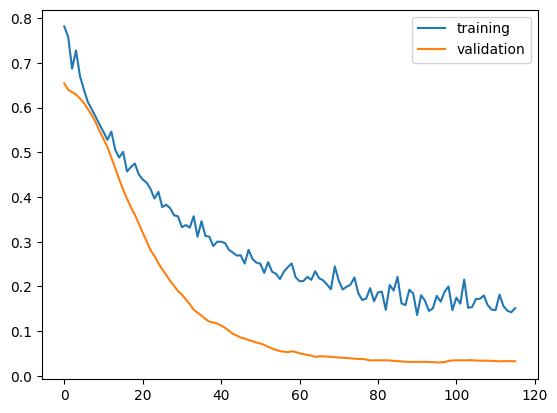

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Confusion Matrix:
[[85  4]
 [ 0 48]]


In [6]:
num_layers = 5
num_neurons = 10
num_epochs = 150
train_and_evaluate(num_layers, num_neurons, num_epochs)

#How to interpret the confusion matrix？
#The more data points that fall on the diagonal, the better the classification performance of the model.

# Experiment with different dropout rates

In [28]:
def train_with_dropout(drop_ratio, num_epochs=100, num_layers=4, num_neurons=10):
    print(f'Training model with dropout rate of {drop_ratio}...')
    model = create_model(num_neurons=num_neurons, num_layers=num_layers, drop_ratio=drop_ratio)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, batch_size=80, epochs=num_epochs, verbose=0, validation_split=0.1)

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)

    # Plot training history
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)


Training model with dropout rate of 0...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 60 (240.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9672 - loss: 0.1002 
Test accuracy: 0.956204354763031
Test loss 0.12157945334911346


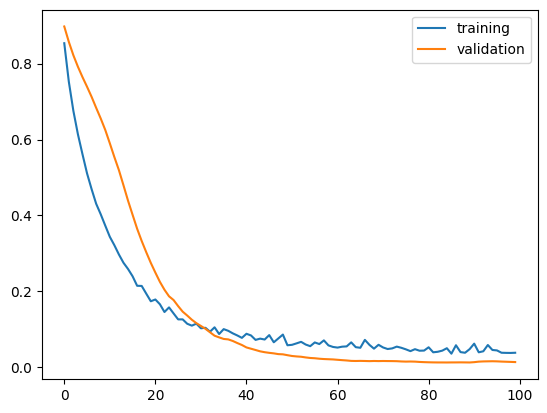

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
[[85  4]
 [ 2 46]]


In [29]:
# Example Usage:
drop_ratio = 0  # or any value between 0 and 0.4 as per your previous loop
train_with_dropout(drop_ratio)

Training model with dropout rate of 0.4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 60 (240.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.1065 
Test accuracy: 0.9635036587715149
Test loss 0.11756221950054169


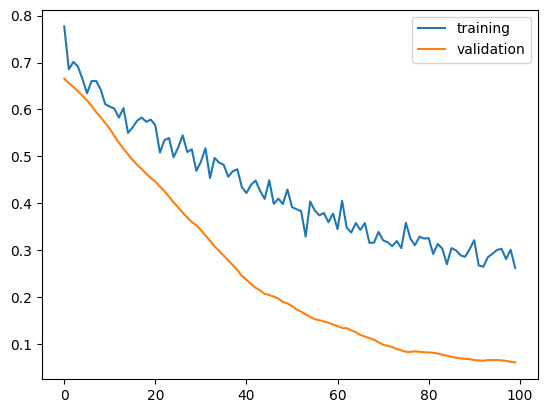

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Confusion Matrix:
[[85  4]
 [ 1 47]]


In [31]:
# Example Usage:
drop_ratio = 0.4  # or any value between 0 and 0.4 as per your previous loop
train_with_dropout(drop_ratio)

Training model with dropout rate of 0.5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 60 (240.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9249 - loss: 0.3090 
Test accuracy: 0.9270073175430298
Test loss 0.3046512007713318


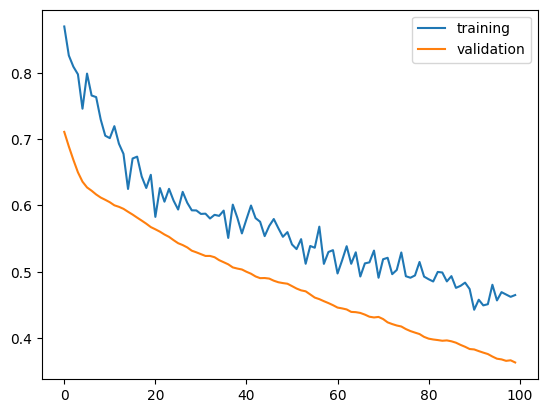

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Confusion Matrix:
[[89  0]
 [10 38]]


In [30]:
# Example Usage:
drop_ratio = 0.5  # or any value between 0 and 0.4 as per your previous loop
train_with_dropout(drop_ratio)

# Experiment with different activation functions

In [32]:
def train_with_activation(activation_func, num_epochs=100, num_layers=2, num_neurons=10):
    print(f"Training model with {activation_func} activation function...")
    model = create_model(num_neurons=num_neurons, num_layers=num_layers, activation=activation_func)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, batch_size=80, epochs=num_epochs, verbose=0, validation_split=0.1)

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)

    # Plot training history
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()
    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

Training model with sigmoid activation function...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 20 (80.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.1061 
Test accuracy: 0.9635036587715149
Test loss 0.12179172784090042


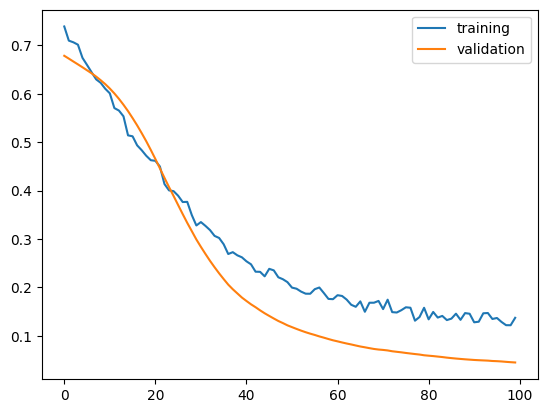

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Confusion Matrix:
[[85  4]
 [ 1 47]]


In [33]:
# Example Usage:
activation = 'sigmoid'  # can be 'relu', 'tanh', or 'sigmoid'
train_with_activation(activation)

# Implement early stopping

In [34]:
import seaborn as sns
def train_with_early_stopping_and_visualize(num_epochs=500, num_layers=4, num_neurons=10, patience=100):
    print("Training model with early stopping...")

    es = EarlyStopping(monitor='val_loss', patience=patience)
    model = create_model(num_neurons=num_neurons, num_layers=num_layers)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, batch_size=80, epochs=num_epochs, verbose=2, validation_split=0.1, callbacks=[es])

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)

    # Visualization
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display confusion matrix visually
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



Training model with early stopping...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                     │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 60 (240.00 B)

Epoch 1/500
7/7 - 4s - 517ms/step - accuracy: 0.4094 - loss: 0.8890 - val_accuracy: 0.2545 - val_loss: 0.6972
Epoch 2/500
7/7 - 0s - 10ms/step - accuracy: 0.4623 - loss: 0.8379 - val_accuracy: 0.7636 - val_loss: 0.6807
Epoch 3/500
7/7 - 0s - 11ms/step - accuracy: 0.4807 - loss: 0.7914 - val_accuracy: 0.7455 - val_loss: 0.6700
Epoch 4/500
7/7 - 0s - 19ms/step - accuracy: 0.5540 - loss: 0.7141 - val_accuracy: 0.6909 - val_loss: 0.6666
Epoch 5/500
7/7 - 0s - 10ms/step - accuracy: 0.6151 - loss: 0.6846 - val_accuracy: 0.7091 - val_loss: 0.6617
Epoch 6/500
7/7 - 0s - 11ms/step - accuracy: 0.6212 - loss: 0.6755 - val_accuracy: 0.7091 - val_loss: 0.6554
Epoch 7/500
7/7 - 0s - 12ms/step - accuracy: 0.6415 - loss: 0.6559 - val_accuracy: 0.7091 - val_loss: 0.6461
Epoch 8/500
7/7 - 0s - 11ms/step - accuracy: 0.6843 - loss: 0.6243 - val_accuracy: 0.7091 - val_loss: 0.6353
Epoch 9/500
7/7 - 0s - 12ms/step - accuracy: 0.7271 - loss: 0.5822 - val_accuracy: 0.7273 - val_loss: 0.6233
Epoch 10/500
7/7 -

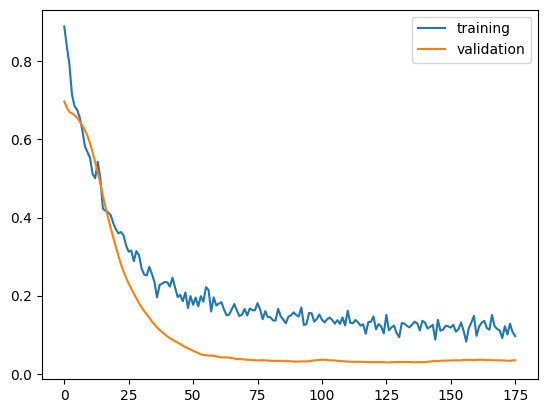

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[85  4]
 [ 0 48]]


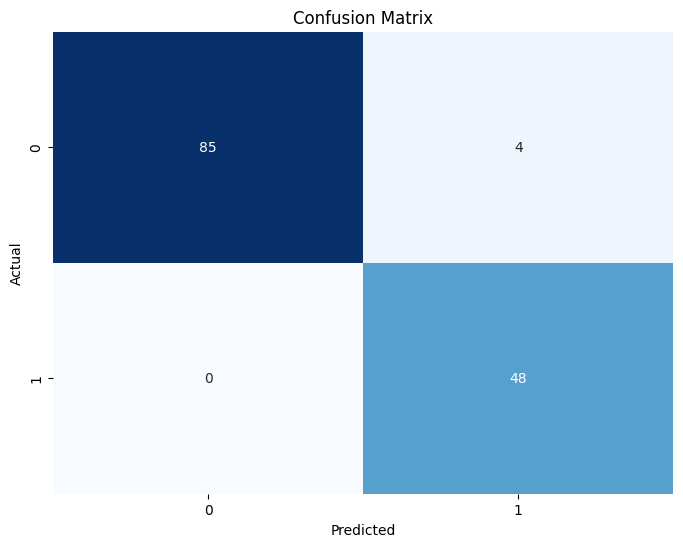

In [35]:
train_with_early_stopping_and_visualize(patience=50)